# [Exploration 7] 프로젝트 : 나랑 닮은 연예인을 찾아보자   
#### 연예인 사진과 내 사진을 비교해서 닮은 연예인을 찾는 프로젝트를 진행해본다.

## Step1. 사진 모으기

### 1.  내 사진 찍기 (2장 이상)   

먼저, 가져온 내 사진의 얼굴을 인식해보겠다.

[(390, 464, 613, 241)]


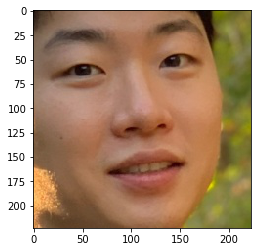

In [14]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/ebh2.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

얼굴이 잘 나왔다 ㅎㅎ   
이번에는, path만 정해주면 얼굴을 찾아주는 함수를 정의해본다.

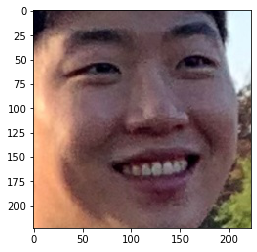

In [15]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0:
        return []
    else:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]

    return cropped_face

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/ebh3.jpg'
corpped_face = get_gropped_face(image_path)
plt.imshow(corpped_face)

화질이 좋지 않았고 역광이 진 사진이라 걱정했는데 다행이 얼굴 detection 이 잘 되었다.   
다음으로는 `file_list`라는 변수에다가 저장해놓은 내 사진을 전부 가져오겠다.

그리고 다음으로는 내 얼굴사진의 임베딩 벡터를 구한다음, 내 얼굴끼리의 거리를 구해보겠다. 

In [16]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

먼저, 얼굴사진이 들어있는 파일 경로를 지정해준 후, `file_list`변수에 파일들을 담아두겠다.

In [17]:
image_file = os.path.join(dir_path, 'ebh2.jpg')
face = get_gropped_face(image_file)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-1.13386929e-01,  8.61003324e-02,  1.43865533e-02, -6.37078583e-02,
        -1.01354234e-01, -8.07145089e-02, -6.91533089e-02, -1.49821669e-01,
         1.57655314e-01, -8.96731317e-02,  2.21936896e-01, -9.76217017e-02,
        -1.84621081e-01, -9.68377814e-02, -4.50703092e-02,  1.74906850e-01,
        -2.12973639e-01, -9.71494168e-02, -4.91630286e-02,  6.07687607e-03,
         1.08190186e-01,  6.71700481e-03,  1.15530407e-02,  8.08509290e-02,
        -7.29818046e-02, -3.52017969e-01, -8.56207535e-02, -4.50071469e-02,
         4.46171835e-02, -2.34971195e-02, -5.71301654e-02,  6.19700961e-02,
        -1.90542132e-01, -9.42884386e-02,  2.99683586e-02,  1.34155706e-01,
        -1.74910221e-02, -9.07725543e-02,  1.72638714e-01, -3.95643935e-02,
        -2.45343775e-01,  5.65571226e-02,  5.59806153e-02,  2.26508662e-01,
         2.12685943e-01,  2.39731092e-02,  4.24654931e-02, -1.61913484e-01,
         1.85764134e-01, -1.29446998e-01, -7.50914216e-03,  1.96401328e-01,
         6.2

`os.path.join`는 경로와 파일을 합치는 것이다. ebh2.jpg 파일을 dir_path에 있는 경로에 합쳐서,   
image_file에는 ebh2.jpg이 들어갔고, `get_gropped_face`함수에 `image_file(ebh2.jpg)`을 넣어서 `face`에 크롭된 내 얼굴이 들어간다.   
그리고, `face_recognition.face_encodings`를 활용해서 embedding값을 구할 수 있다.
emdedding값은 `embedding`이라는 변수에 할당되어있다.   
즉 현재, ebh2라는 사진은 얼굴이 크롭되어 있고, 그 embedding값은 `embedding`에 들어가 있다. 그리고 그 값은 위와 같다.

다음 스텝으로는 모든 사진의 **embedding**값을 구하는 것이다. 그래야 사진들 간의 거리를 확인할 수 있다.   
**embedding**값을 구하기 전에 먼저 모든 사진들의 임베딩 값을 `사진이름 : embedding`의 딕셔너리 형태로 만들어주겠다.

In [18]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if len(face)==0: continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

위에서 정의해뒀던 `get_gropped_face`와 `get_face_embedding`함수를 활용하여 얼굴을 **detection**하여 자르고, **embedding**값을 구해 `embedding_dict`에 딕셔너리 형태로 넣었다. 파일명을 잘 해놨으면 더 편했을텐데.. 내 파일명은 ebh2, ebh3, ebh4, ebh5 총 4개의 사진파일이 들어가 있다.   
   
   
최종적으로는 `get_face_embedding_dict`함수를 dir_path를 받아서 embedding값을 불러올 수 있다.

In [19]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['ebh5'] #잘된다 굿

array([-0.07036863,  0.05166324,  0.01509629, -0.04593987, -0.17582475,
       -0.07168995, -0.03591997, -0.09352215,  0.13104784, -0.0904222 ,
        0.19143377, -0.1253795 , -0.23822552, -0.0454292 , -0.06364965,
        0.24661343, -0.17592184, -0.1330678 , -0.08134384,  0.02663046,
        0.07900381,  0.01544969, -0.01170653,  0.05702999, -0.05567081,
       -0.33369765, -0.07085121, -0.0857892 , -0.00648221, -0.06968614,
       -0.03408512,  0.05044404, -0.15050255, -0.04637963,  0.0455719 ,
        0.05945423,  0.00918182, -0.09023134,  0.15352002,  0.01330995,
       -0.33026314,  0.01411491,  0.02336963,  0.21677321,  0.12756057,
        0.0736963 , -0.00593866, -0.16442239,  0.13594654, -0.18431926,
        0.04174646,  0.11707889,  0.0873486 , -0.01078653, -0.00785613,
       -0.12151802,  0.01878607,  0.1251941 , -0.13728975, -0.06392766,
        0.12217511, -0.04587977, -0.02028599, -0.16231802,  0.2715199 ,
        0.095651  , -0.11286557, -0.12242992,  0.14319843, -0.12

이제 진짜로 사진들간의 거리를 구할 준비가 되었다.   
   
   
다차원의 벡터간의 거리를 구하려면 넘파이의 `np.linalg.norm`을 사용하면 쉽게 구할 수 있다.


In [20]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print(get_distance('ebh2', 'ebh3'))
print(get_distance('ebh3', 'ebh4'))
print(get_distance('ebh4', 'ebh5'))
print(get_distance('ebh5', 'ebh2'))

0.26944101808987736
0.3119008893233475
0.47951114970454867
0.4676745316075674


이정도면 가깝다고 할수 있는건가.....   
_(기준으로 삼을수는 있을것 같다.)_

### 2. 비교할 연예인 사진 모으기

In [21]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'

약 300장의 연예인 사진을 준비하였다.

## Step2. 얼굴 영역 자르기

**Step1**에서 했던 작업을 반복하여 연예인 사진의 얼굴 부분을 추출해보도록 하자. 

[(96, 253, 225, 124)]


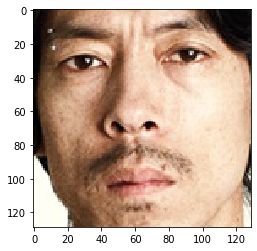

In [22]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/김C.jpeg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) ==0 :
        cropped_face = []
    else:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]

    return cropped_face

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/김C.jpeg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

테스트로 김C의 얼굴을 잘라보았다.

## Step3. 얼굴 영역의 임베딩 추출하기

먼저 연예인 사진 파일이 저장되어 있는 디렉토리를 지정하고 파일을 `file_list`라는 변수에 할당해주겠다.

In [23]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['공유.jpg', '박찬욱.jpeg', '유리.jpg', '잇섭.png', '이종석.jpeg', '화사.jpg', '박용택.jpg', '곽도원.jpg', '수호.jpg', '김유정.jpg', '박정민.jpg', '태연.jpg', '문재인.jpeg', '온앤오프라운.jpg', 'b1a4진영.jpeg', '최현석.jpg', '태양.jpeg', '씨잼.jpg', '아이즈원조유리.jpeg', '정우성.jpeg', '노홍철.jpeg', '이동국.jpeg', '이승철.jpeg', '이명박.jpg', '류준열.jpg', '이대호.jpeg', '주호민.jpeg', '앤드류 응.png', '아놀드 슈워제네거.jpg', '김영삼.jpeg', 'clinton.jpeg', '김대중.jpg', '길.jpg', '이성민.jpg', '지디.jpg', '벤 에플렉.jpeg', '김희철.jpg', '제니.jpg', '이안 굿펠로우.jpg', '주진모(올드).jpg', 'bush.jpeg', '기성용.jpg', '조이.jpg', '대도서관.jpeg', '리아.jpg', '잭 갤리퍼내키스.jpg', '개리.jpg', '슈가.jpg', '러블리즈지수.jpeg', '장동건.jpeg', '유지태.jpg', '류승룡.jpeg', '딕헌터.jpeg', '브래들리 쿠퍼.jpg', '이연걸.jpeg', '이준혁.jpeg', '유해진.jpg', '케빈 스페이시.jpeg', '박진영.jpg', '잇지유나.jpg', '조원희.jpg', '김연우.jpeg', '솔라.jpg', '비니.jpg', '김윤석.jpeg', '아이유.jpg', '유재석.jpg', '하정우.jpg', '박휘순.jpg', '카이.jpg', '조인성.jpg', '나인뮤지스경리.jpg', '지코.jpg', '매드클라운.jpeg', '지호.jpg', 'trump.jpg', '아이즈원민주.jpg', '승희.jpeg', '성시경.jpg', '황정민.jpg', '박명수.jpg', '김종서.jpg', '문별.jpg', '톰 홀랜드.j

이어서 `face_recognition.face_encodings`을 활용하여 **embedding**값을 구하는 함수를 정의한다.

In [24]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

다음으로는 **celebrity**폴더에 들어있는 모든 사진의 **embedding**값을 dictionary형태로 저장한다.   
이는 나중에 내 사진과 비교해서 어떤 사진이 내 얼굴과 가까운지 비교할 수 있게 해준다.

In [25]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if len(face) ==0: continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

다시 한번 더 김C의 embedding값을 확인해보겠다.

In [26]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['김C']

array([-0.03727031,  0.11417035,  0.02397809, -0.01457941, -0.02597834,
       -0.03141514, -0.05027122, -0.18276134,  0.14515582, -0.11487748,
        0.28283077,  0.01221076, -0.14283526, -0.07557856, -0.0581929 ,
        0.12518202, -0.23215242, -0.08547299, -0.01407811, -0.05755843,
        0.10516186,  0.03441474,  0.00899078,  0.02365734, -0.07264385,
       -0.22481558, -0.11573412, -0.14867994,  0.12937407, -0.04714192,
       -0.05153349, -0.08782273, -0.16601063, -0.02063305,  0.0379179 ,
        0.01692314, -0.03454862, -0.06868179,  0.16481252, -0.03403156,
       -0.12599654,  0.06344315,  0.04041981,  0.26618013,  0.2391517 ,
        0.02777313,  0.00660458, -0.16749839,  0.10693315, -0.14739977,
        0.04973653,  0.11050837,  0.13522394,  0.12579522,  0.02921838,
       -0.2016672 ,  0.0379683 ,  0.09412619, -0.1463666 ,  0.07917114,
        0.13545974, -0.06424733,  0.04887379, -0.02889581,  0.24872611,
        0.03726955, -0.1539813 , -0.14419778,  0.03559554, -0.18

## Step4. 모은 연예인들과 비교하기

In [27]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [29]:
get_distance('ebh2', '김C')

0.6101951649465136

이 단계까지 와서 내 사진과 비교사진이 한 폴더에 있고, 같은 딕셔너리 안에 있어야 한다는 것을 깨달았다.   
같은 폴더에 넣고, 딕셔너리 형태 = embedding값으로 바꿔보겠다.   
   
   
김C와 나는 그렇게 닮은 정도는 아닌것 같다.

이제 모든 연예인들과 비교해서 top5를 선정해보겠다.

In [30]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('ebh2')

In [31]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('ebh2',
  array([-1.13386929e-01,  8.61003324e-02,  1.43865533e-02, -6.37078583e-02,
         -1.01354234e-01, -8.07145089e-02, -6.91533089e-02, -1.49821669e-01,
          1.57655314e-01, -8.96731317e-02,  2.21936896e-01, -9.76217017e-02,
         -1.84621081e-01, -9.68377814e-02, -4.50703092e-02,  1.74906850e-01,
         -2.12973639e-01, -9.71494168e-02, -4.91630286e-02,  6.07687607e-03,
          1.08190186e-01,  6.71700481e-03,  1.15530407e-02,  8.08509290e-02,
         -7.29818046e-02, -3.52017969e-01, -8.56207535e-02, -4.50071469e-02,
          4.46171835e-02, -2.34971195e-02, -5.71301654e-02,  6.19700961e-02,
         -1.90542132e-01, -9.42884386e-02,  2.99683586e-02,  1.34155706e-01,
         -1.74910221e-02, -9.07725543e-02,  1.72638714e-01, -3.95643935e-02,
         -2.45343775e-01,  5.65571226e-02,  5.59806153e-02,  2.26508662e-01,
          2.12685943e-01,  2.39731092e-02,  4.24654931e-02, -1.61913484e-01,
          1.85764134e-01, -1.29446998e-01, -7.50914216e-03,  1.964

In [48]:
def get_nearest_face(name, top=7):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [56]:
get_nearest_face('ebh4')

순위 1 : 이름(ebh2), 거리(0.26876923195248464)
순위 2 : 이름(ebh3), 거리(0.3119008893233475)
순위 3 : 이름(김광현), 거리(0.3536963778309955)
순위 4 : 이름(이희준), 거리(0.357906813098306)
순위 5 : 이름(박건우), 거리(0.3807464234464225)
순위 6 : 이름(이영하), 거리(0.39721920042048137)
순위 7 : 이름(박재범), 거리(0.4009717781372538)


태어나서 처음 들어보는데... 야구선수가 많이 나왔다.   
나는 야구선수상인가보다.

# 회고:  
## 1. **이번 프로젝트에서 어려웠던 점**   
이번 프로젝트는 노드를 따라서 하면 크게 어려운점은 없었는데 중간에 에러가 난 부분에서 머리를 조금 싸맸다. 오류에 대해 설명해보자면,`face_recognition.face_locations()` 패키지를 사용해서 detected, cropped face를 리스트값으로 반환하는 과정에서 얼굴 인식을 하지 못했을시, 빈 값을 반환하게 되어 있었다. 이후 연예인 얼굴과, 내 얼굴을 임베딩 하면서 빈 값때문에 임베딩이 되지 않는 오류가 생겼다. detect했을 때 빈 값으로 반환하지 말고 아무 값도 나오지 않게 하면 되는 간단한 문제였는데 해결하는데 한참 시간을 보냈다.   
다행히 비슷한 오류를 가지고 계신분이 해결책을 알려주셨고, 친절한 설명과 함께 오류를 해결할 수 있었다. 다시한번 감사드린다.


   
## 2. **프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점**   
프로젝트를 진행하면서 다시 한번 **패키지**의 대단함을 느낀다. 얼굴을 인식하는데 `face_recognition` `패키지의 face_locations()`모듈만 사용하면 얼굴인식이 된다니...너무 고마운 패지키이다...



## 3. **루브릭 평가 지표를 맞추기 위해 시도한 것들**   
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다. -  닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.   
다수의 야구선수가 나와 비슷한 임베딩 거리값을 가지고 있었다.

2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다. - 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.
top 5 이내에 있는 연예인들 모두 나와 거리가 0.5 이내에 있다. 근데 매우 닮았다고는 차마 못하겠다.

3. 다양하고 재미있는 결과 시각화를 시도하였다. - matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.  
시각화 부분은 시도하지 않았다.


   
### 4. **만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정**   
만약 루브릭 평가를 달성하지 못해 제출을 하지 못했다면 아마 1번의 에러때문에 연예인 얼굴들의 임베딩 값을 구하지 못했을 것이다. 이번에 해결책을 찾으면서 배운점은, 코드를 실행시켰을 때 에러를 잘 읽어보면 어디 부분에서 에러가 난건지 파악하고 해결할 수 있다는 점도 추가적으로 배우게 되었다.


   
### 5. **자기 다짐**   
다양한 패키지를 사용하면 쉽게 프로젝트를 진행할 수 있다는 것을 배웠다. 얼굴에 스티커를 붙이는 프로젝트 보다 쉽게 얼굴 부분을 찾을 수 있었고, 이 과정이 패키지 하나 때문에 가능하다는 게 인상깊었다. (스티커 프로젝트에서는 옆얼굴이나 뒤짚어진 얼굴의 경우는 인식을 하지 못하는 경우가 있었는데 `face_recognition.face_locations()`를 사용하면 어떨지 궁금하다).   
앞으로 배울 노드와 프로젝트에서 다양한 기법들을 경험하고 배우면서 활용성이 늘어날 거라 생각한다.




   